Taking a closer look at SSIM as potential method for automatic keyframe detection

In [1]:
import image_similarity_measures
#from image_similarity_measures.quality_metrics import rmse, psnr
from image_similarity_measures.quality_metrics import metric_functions
import cv2
import pandas as pd
import numpy as np
from typing import List
import time
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn_image as isns
from PIL import Image, ImageOps
#import PIL


In [2]:
all_metrics =  ['ssim']
comparison_images = [ "img/0001.jpg", "img/0108.jpg", "img/0115.jpg", "img/0150.jpg"]

In [3]:
def compare(df: pd.DataFrame, path_a: str, path_b: str, metrics: List[str]) -> pd.DataFrame:
    img_a = cv2.imread(path_a)
    img_b = cv2.imread(path_b)

    for metric in metrics:
        metric_func = metric_functions[metric]
        start_time = time.time()
        out_value = float(metric_func(img_a, img_b))
        end_time = time.time()
        output_dict = {}
        output_dict['metric'] = metric
        output_dict['x'] = path_a
        output_dict['y'] = path_b
        output_dict['value'] = out_value
        output_dict['walltime'] = end_time - start_time
        df = df.append(output_dict,ignore_index=True)
        output_dict['x'] = path_b
        output_dict['y'] = path_a
        df = df.append(output_dict,ignore_index=True)
        
    return df

In [4]:
df = pd.DataFrame()
for idx_x, x in enumerate(comparison_images):
    for idx_y, y in enumerate(comparison_images):
        # remove duplicate comparisons: (x,y) == (y,x) or (x,x)
        if idx_x >= idx_y:
            continue
        df = compare(df, x, y, all_metrics)
df

,metric,x,y,value,walltime
0,ssim,img/0001.jpg,img/0108.jpg,0.914471,0.849600
1,ssim,img/0108.jpg,img/0001.jpg,0.914471,0.849600
2,ssim,img/0001.jpg,img/0115.jpg,0.917692,0.753525
3,ssim,img/0115.jpg,img/0001.jpg,0.917692,0.753525
4,ssim,img/0001.jpg,img/0150.jpg,0.914400,0.743955
5,ssim,img/0150.jpg,img/0001.jpg,0.914400,0.743955
6,ssim,img/0108.jpg,img/0115.jpg,0.968534,0.744344
7,ssim,img/0115.jpg,img/0108.jpg,0.968534,0.744344
8,ssim,img/0108.jpg,img/0150.jpg,0.949975,0.740649
9,ssim,img/0150.jpg,img/0108.jpg,0.949975,0.740649


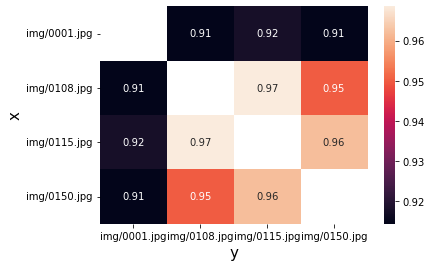

In [5]:
#Build some nice plots for better evaluation
#select one metric and pivot the dataframe for creating the heatmap plot
plot_df = df[df.metric == 'ssim'].pivot('x', 'y', 'value')
ax = sns.heatmap(plot_df, annot=True)


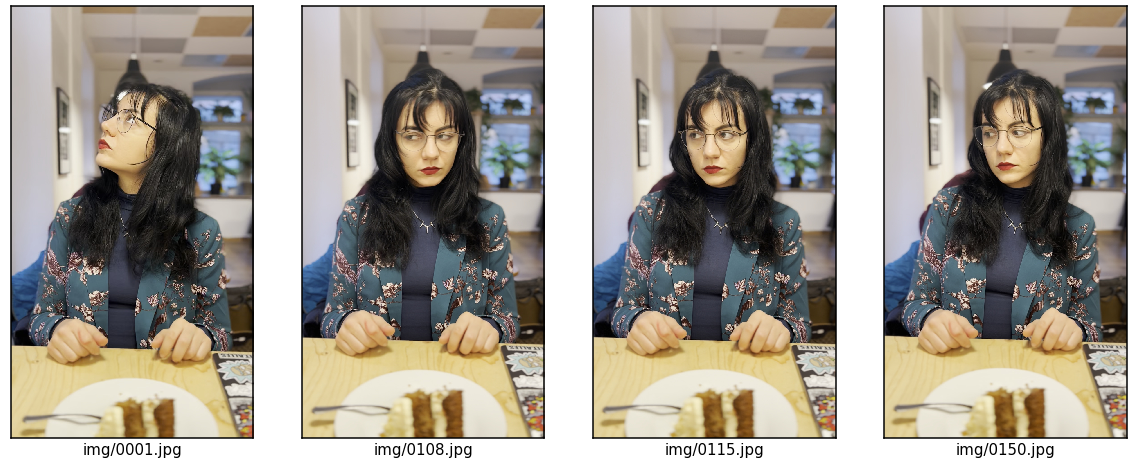

In [6]:
xlen = len(comparison_images)
fig, axes = plt.subplots(1, xlen)
fig.set_size_inches(20,10)
for ax, img_path in zip(axes, comparison_images):
    img = Image.open(img_path)
    isns.imgplot(img, ax=ax, cbar=False)
    ax.invert_yaxis()
    ax.set_xlabel(img_path)